Comparing user reviews with IMDB reviews

In [ ]:
import matplotlib.pyplot as plt
import requests
from matplotlib import style

style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
from bs4 import BeautifulSoup

path = 'gdrive/My Drive/ML/Projects/Data Visualizations/best_tv.html'
fr = open(path, 'r', encoding='utf8').read()
soup = BeautifulSoup(fr, "html.parser")

In [ ]:
tags = soup('span')

add_data = False
ratings = []

remove = []

i = 0
for tag in tags:
  if not tag.contents:
    continue  
  
  text = str(tag.contents[0]).strip()
  if add_data:
    if text == 'tbd':
      #ratings.append(-1)
      remove.append(i)
    else:
      ratings.append(float(text))
    add_data = False
    i += 1
  if str(tag.contents[0]).strip().startswith("User:"):
    add_data = True

meta_rating = []
tags = soup.find_all('div')

i = 0
for tag in tags:
  if not tag.contents:
    continue
  if tag.get('class') == None or len(tag.get('class')) < 4:
    continue
  if tag.get('class')[1] == "small":
    if i in remove:
      i += 1
      continue
    i += 1
    text = str(tag.contents[0]).strip()
    meta_rating.append(float(text)/10)


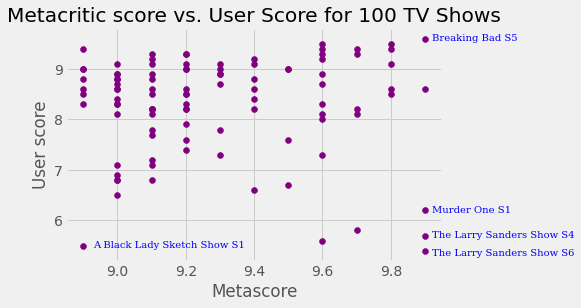

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(meta_rating, ratings, color='purple', label='User Rating')
plt.xlabel('Metascore')
plt.ylabel('User score')
#plt.plot([min(meta_rating), 9.9], [min(meta_rating), 9.9], color='b', linewidth=3, label='Meta rating')
#plt.legend(loc='upper right')
font_dict = {'family' : 'serif', 
               'color' : 'blue', 'size' : 10}
plt.text(9.92, 5.3, "The Larry Sanders Show S6", fontdict=font_dict)
plt.text(9.92, 5.65, "The Larry Sanders Show S4", fontdict=font_dict)
plt.text(9.92, 6.15, "Murder One S1", fontdict=font_dict)
plt.text(8.93, 5.45, "A Black Lady Sketch Show S1", fontdict=font_dict)
plt.text(9.92, 9.55, "Breaking Bad S5", fontdict=font_dict)
#plt.text()
plt.title("Metacritic score vs. User Score for 100 TV Shows")
plt.show()
plt.savefig(fname='metacritic')